In [4]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [5]:
def readCSV():
    #data = pd.read_csv('Cancer_Data.csv')
    data = pd.read_csv('../dataset.csv')
    return data 

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

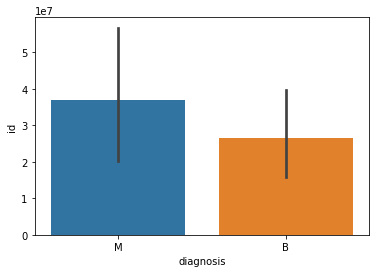

In [6]:
data = readCSV()
#data = data.drop(['Unnamed: 32'],axis=1)
print(data.isnull().sum())

diganosis_dist = data.groupby(['diagnosis']).count().reset_index()
sns.barplot(data=data,x='diagnosis',y='id')
plt.show()

The data is slightly imbalanced dataset hence we might consider class weight in the classification.

In [7]:
data = data.drop(['id'],axis=1)
print(data.columns)
Labels = np.array(data['diagnosis'])
data = data.drop(['diagnosis'] , axis=1)

Labels[Labels=='M']=1
Labels[Labels=='B']=0





Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


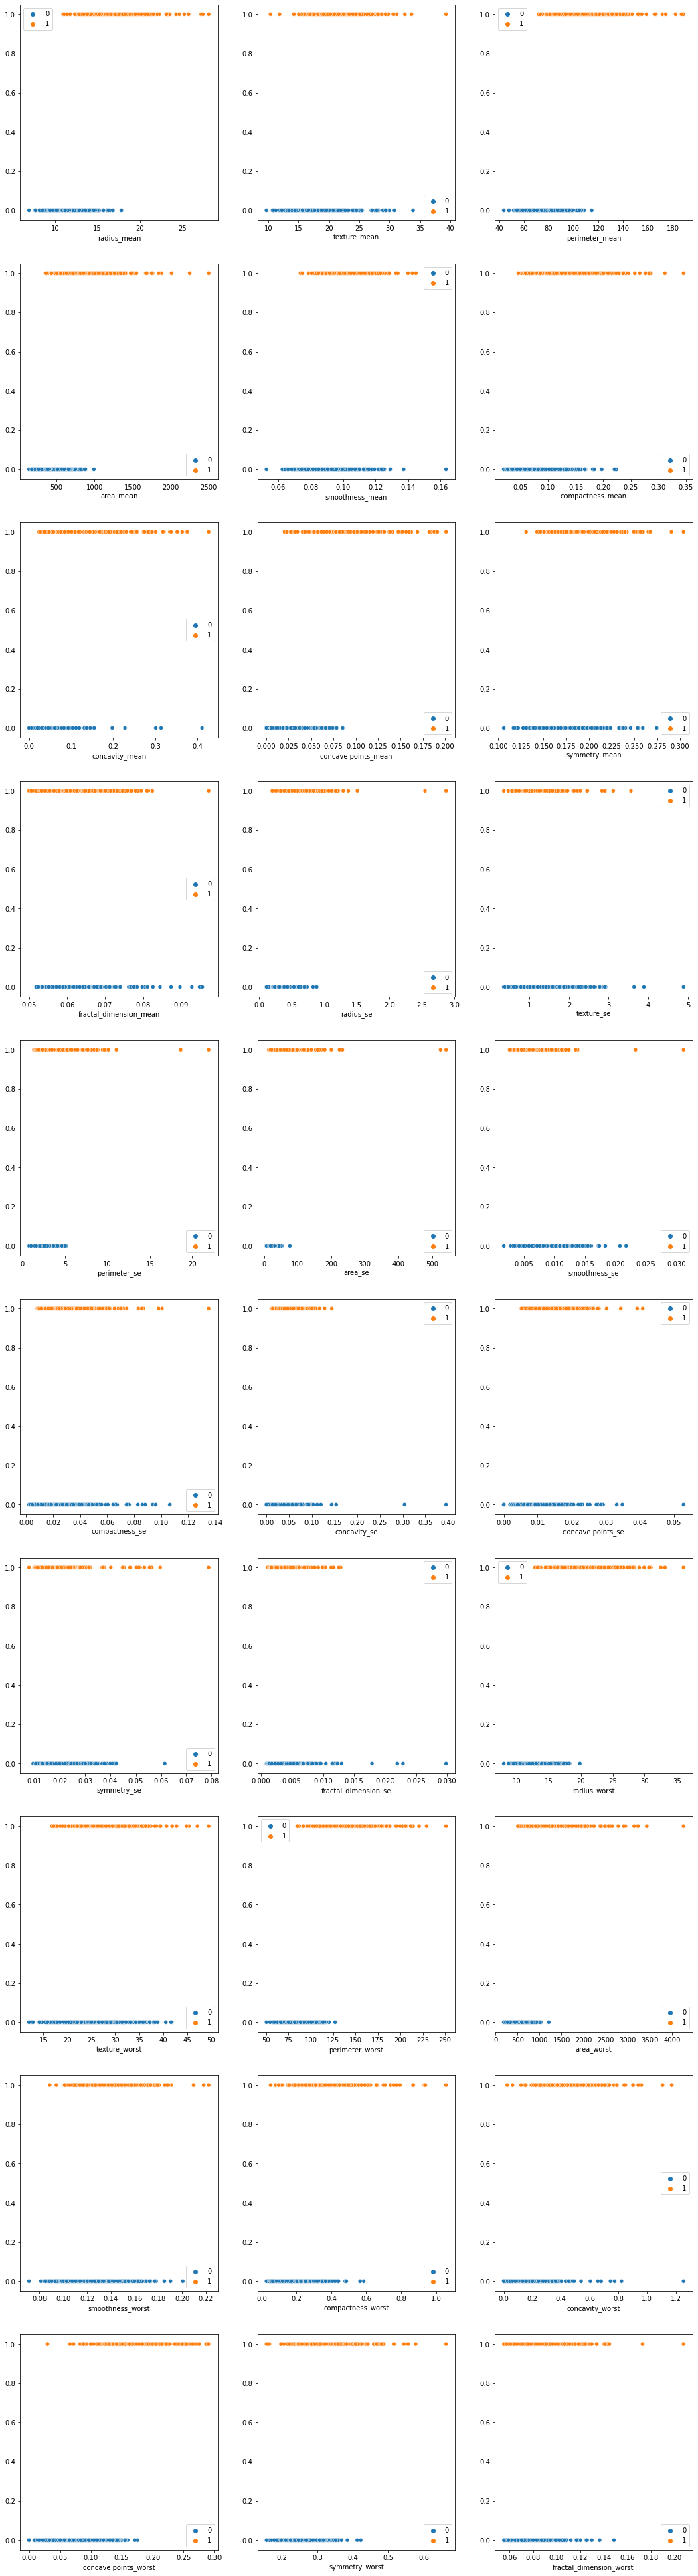

In [8]:
'''sns.boxplot(data=data[data.columns[0:6]])
plt.xticks(rotation=45)
plt.show()'''

fig,axes = plt.subplots(10,3 , figsize=(18, 70))

for i in range (0,10):
    for j in range(0,3):
            sns.scatterplot(ax=axes[i,j] , x =data[data.columns[3*i+j]] ,y = Labels , hue=Labels)
            #axes[i,j].set_title(data.columns[3*i+j])

plt.show()

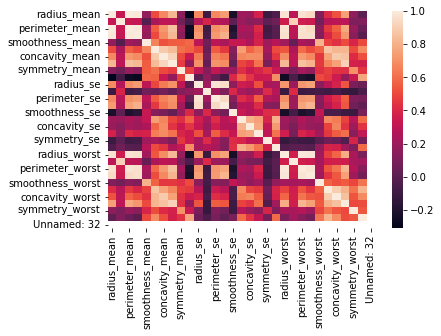

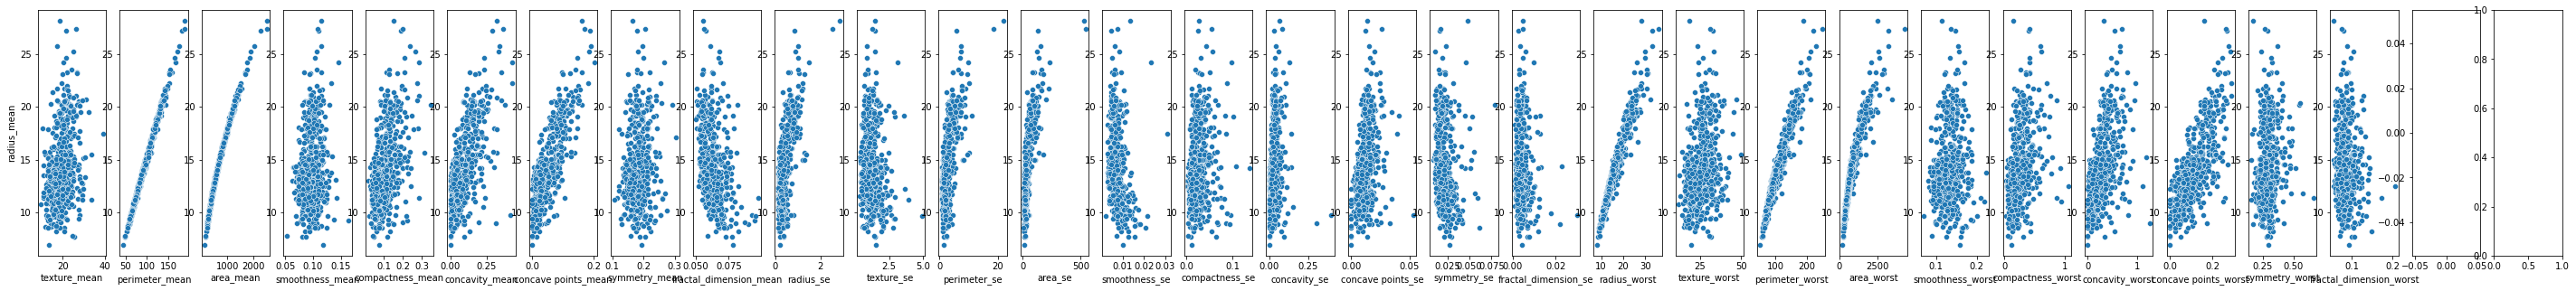

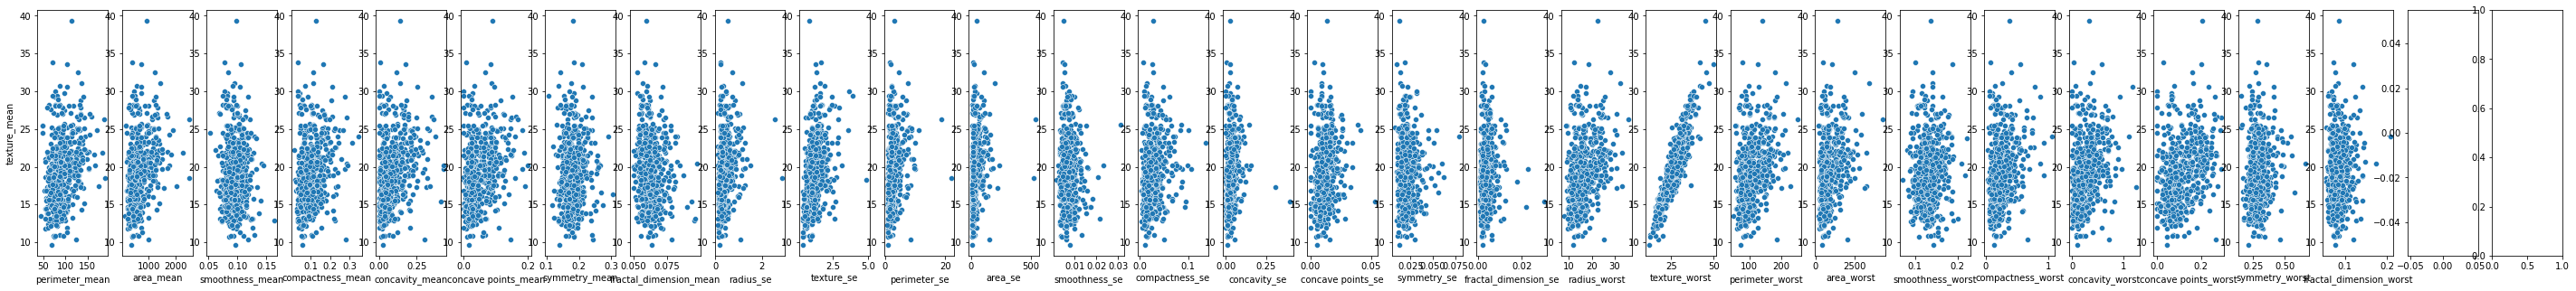

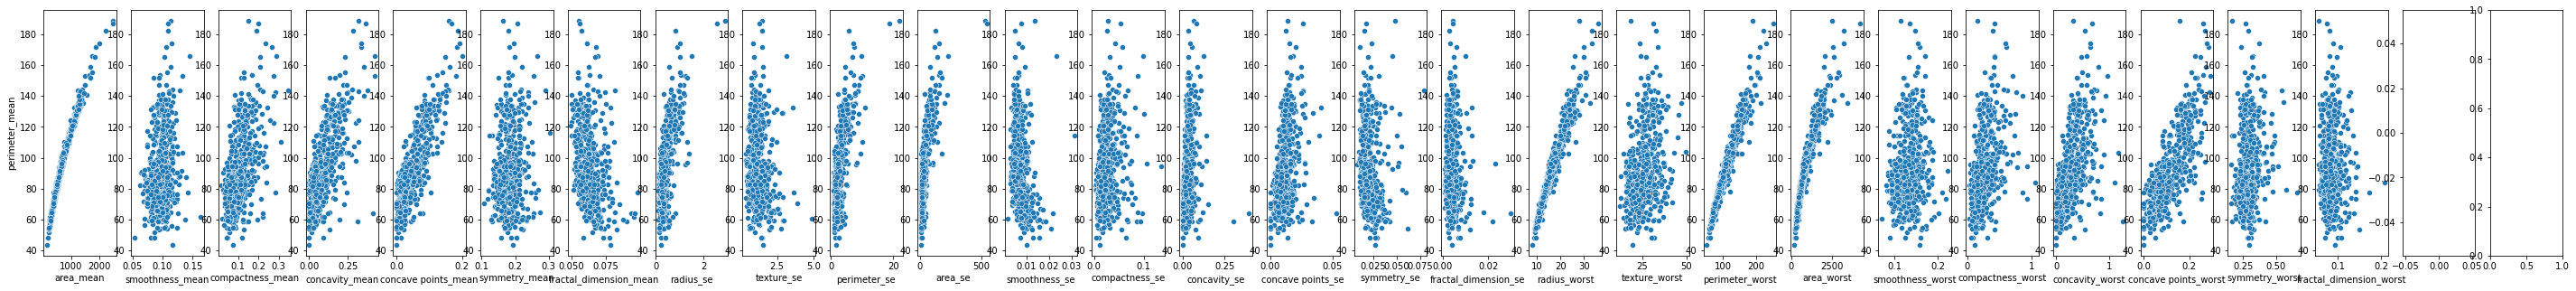

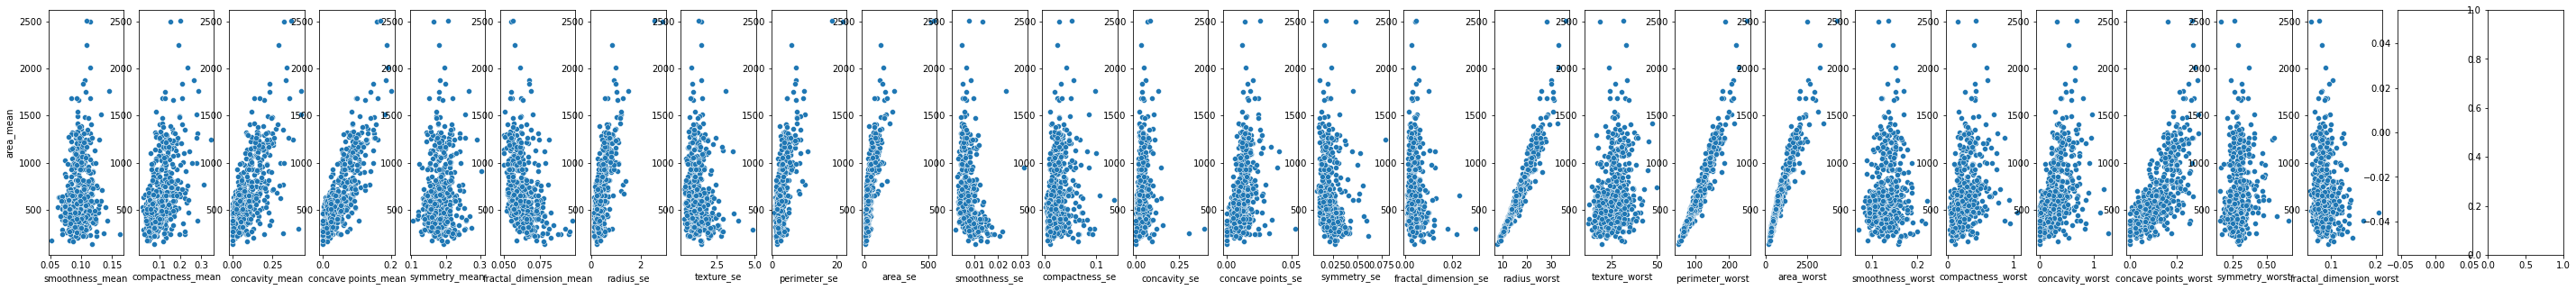

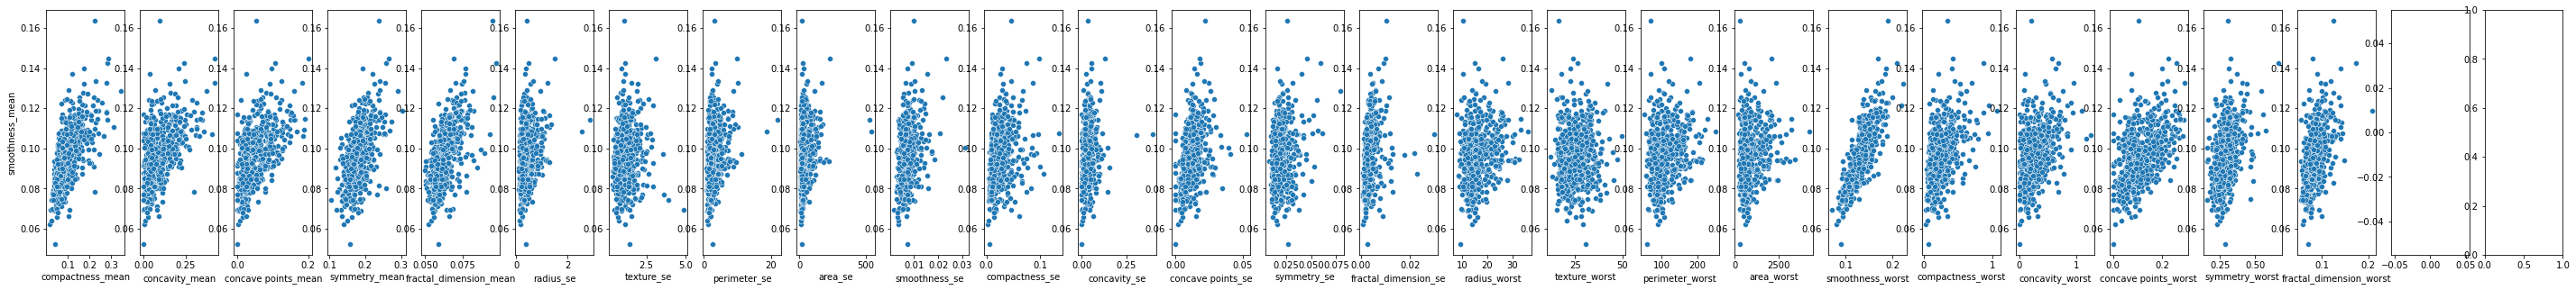

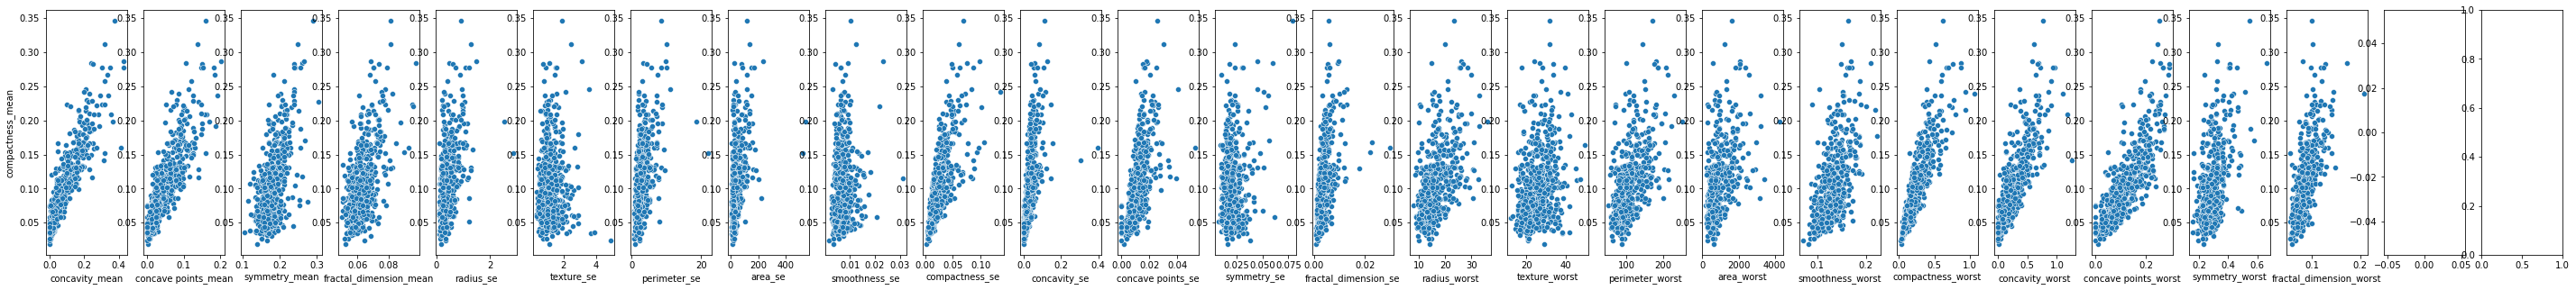

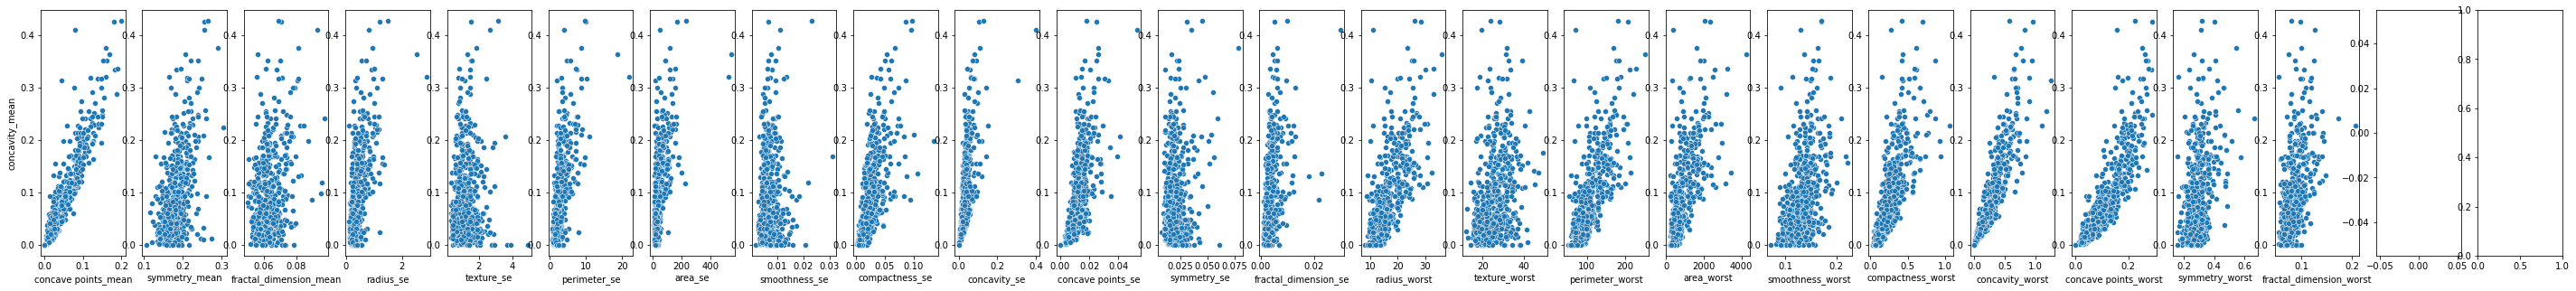

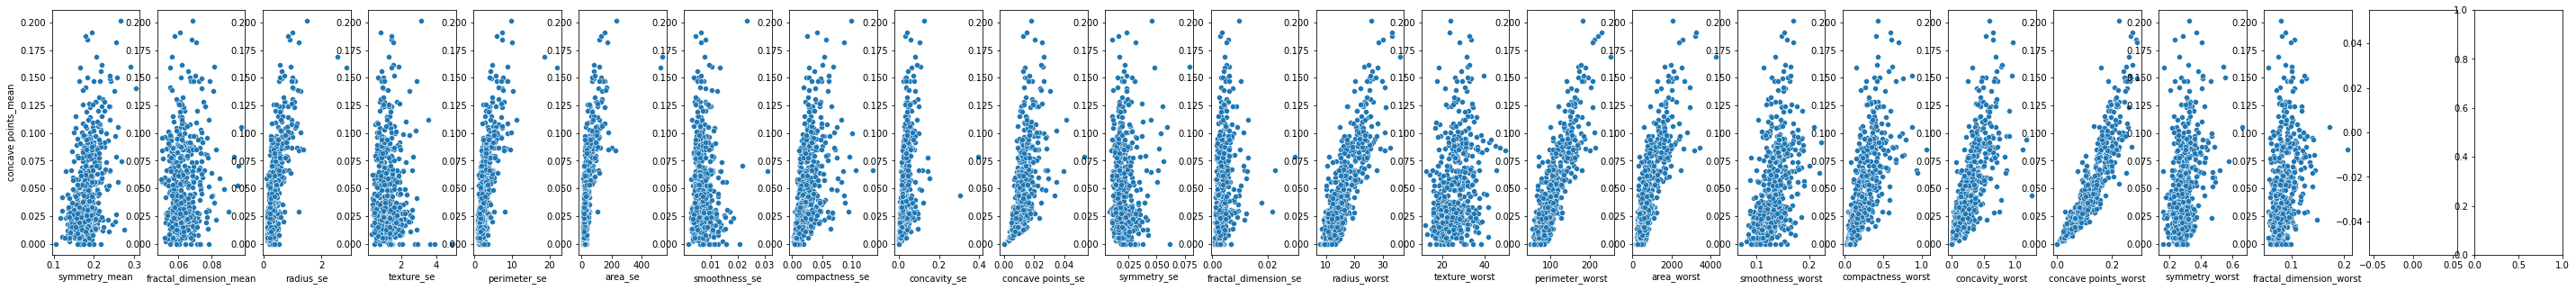

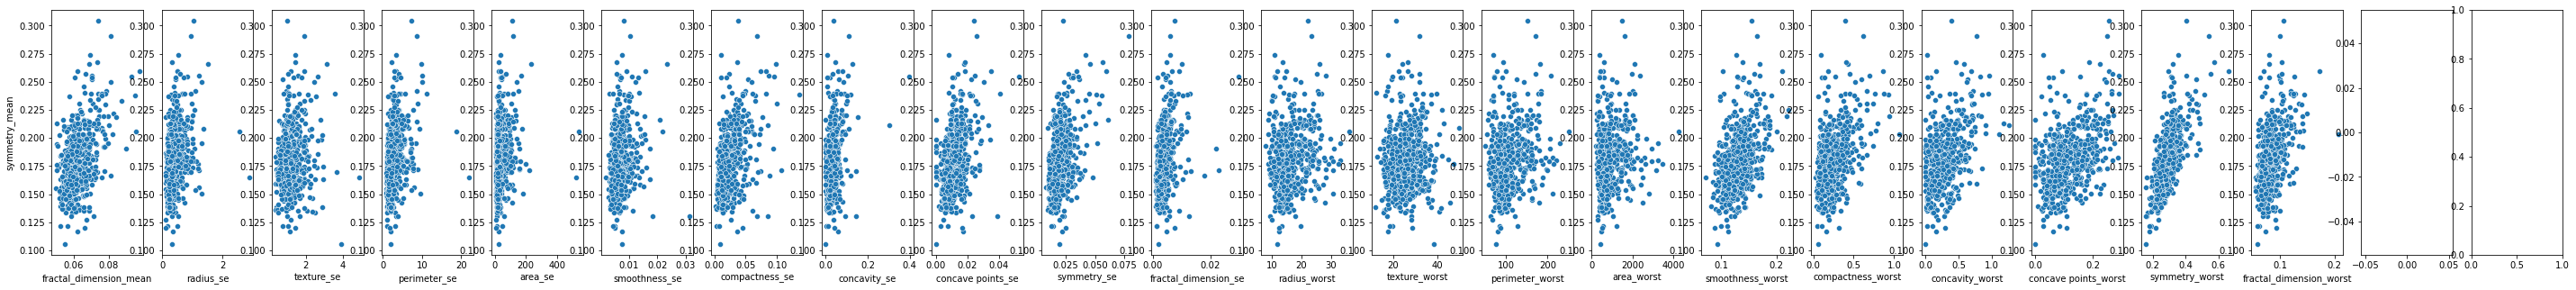

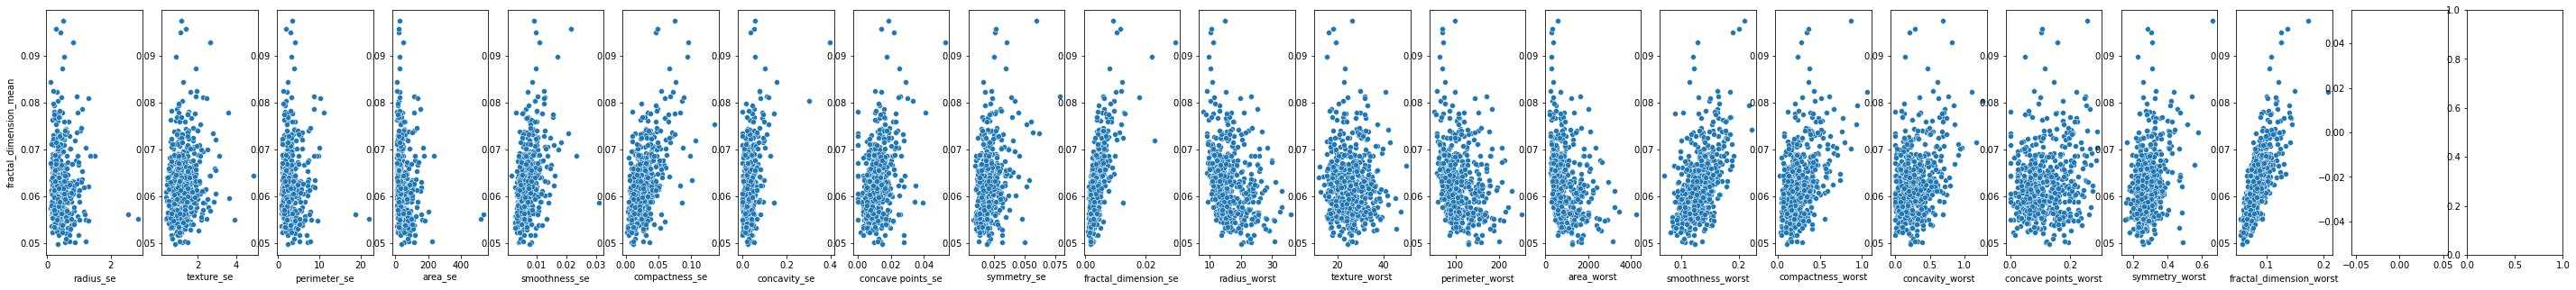

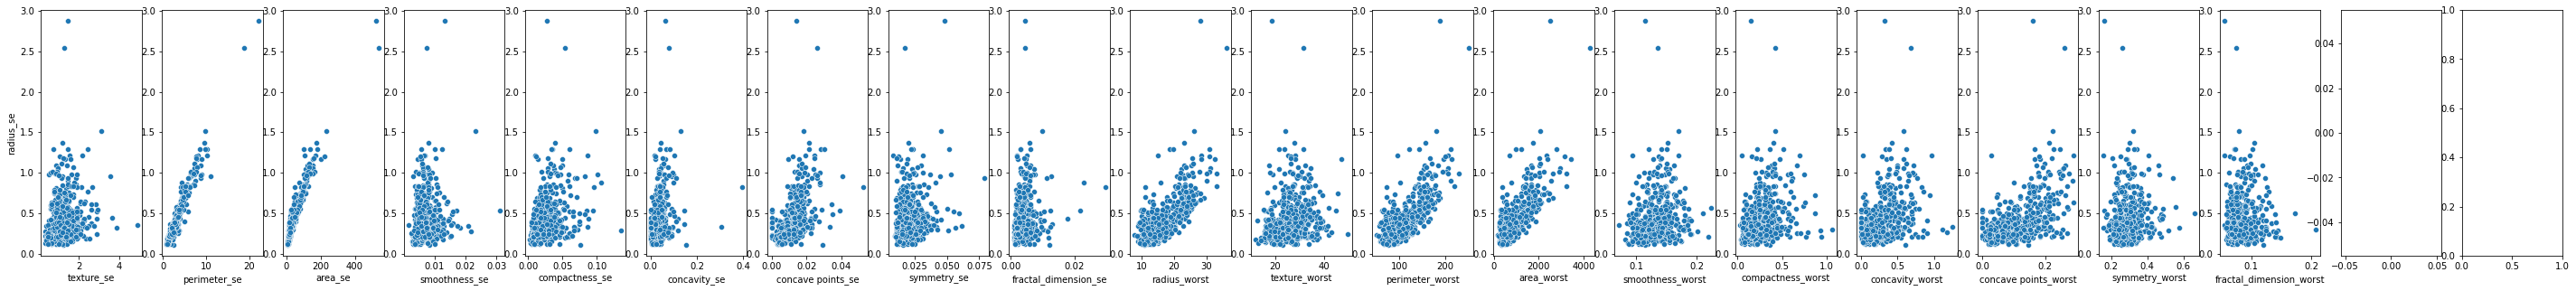

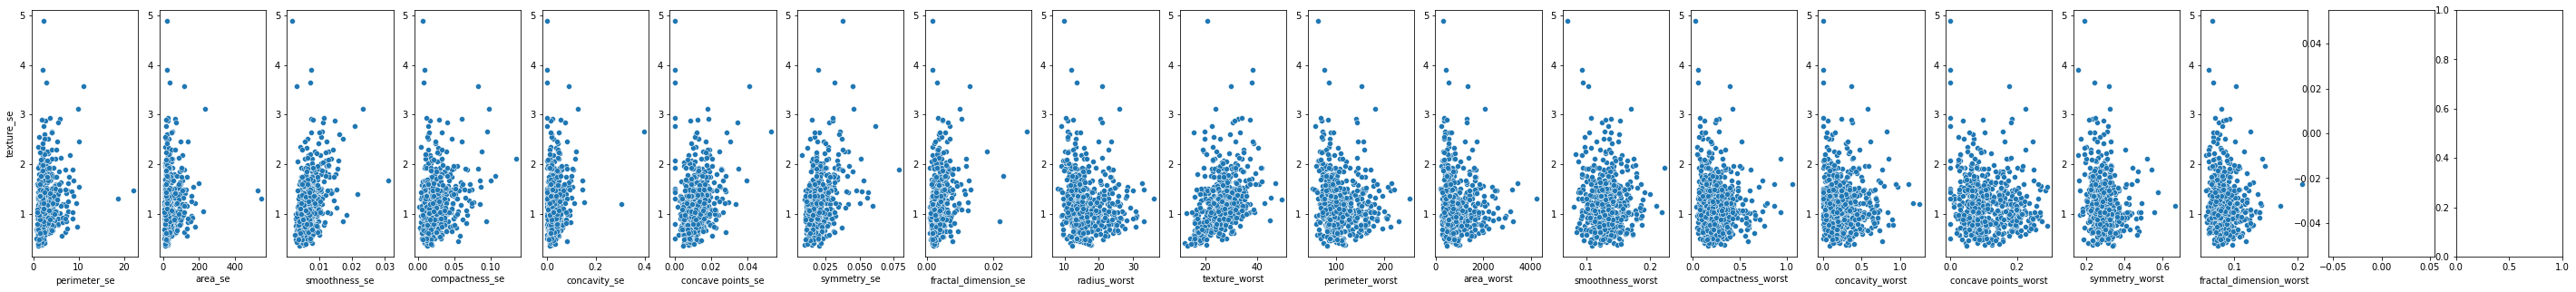

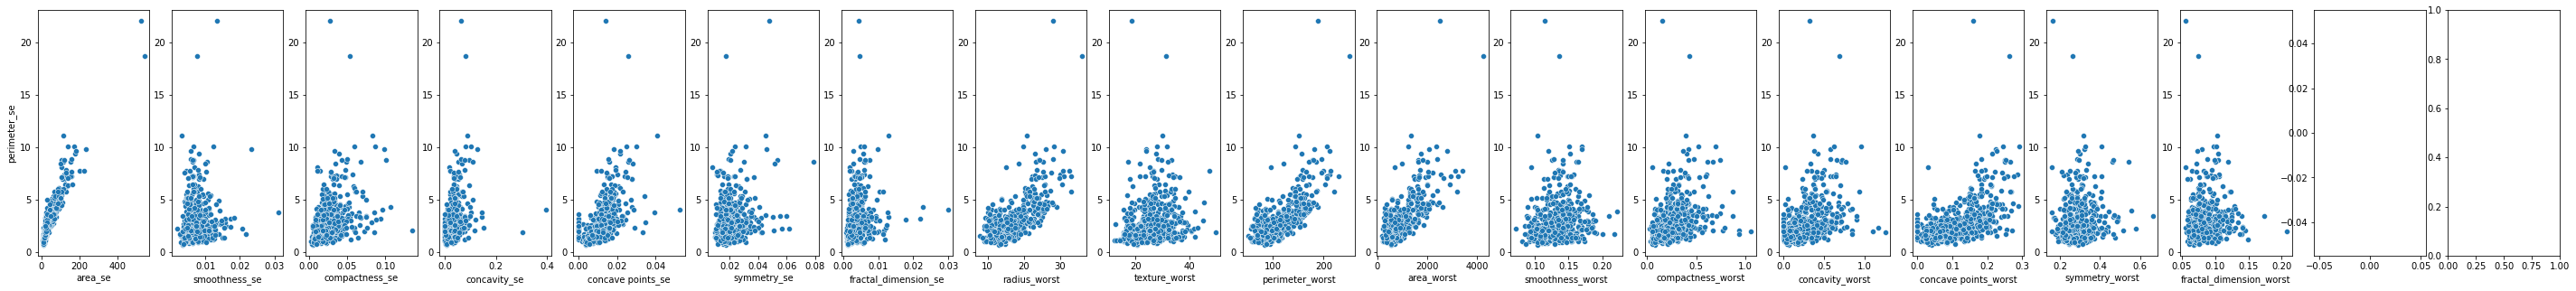

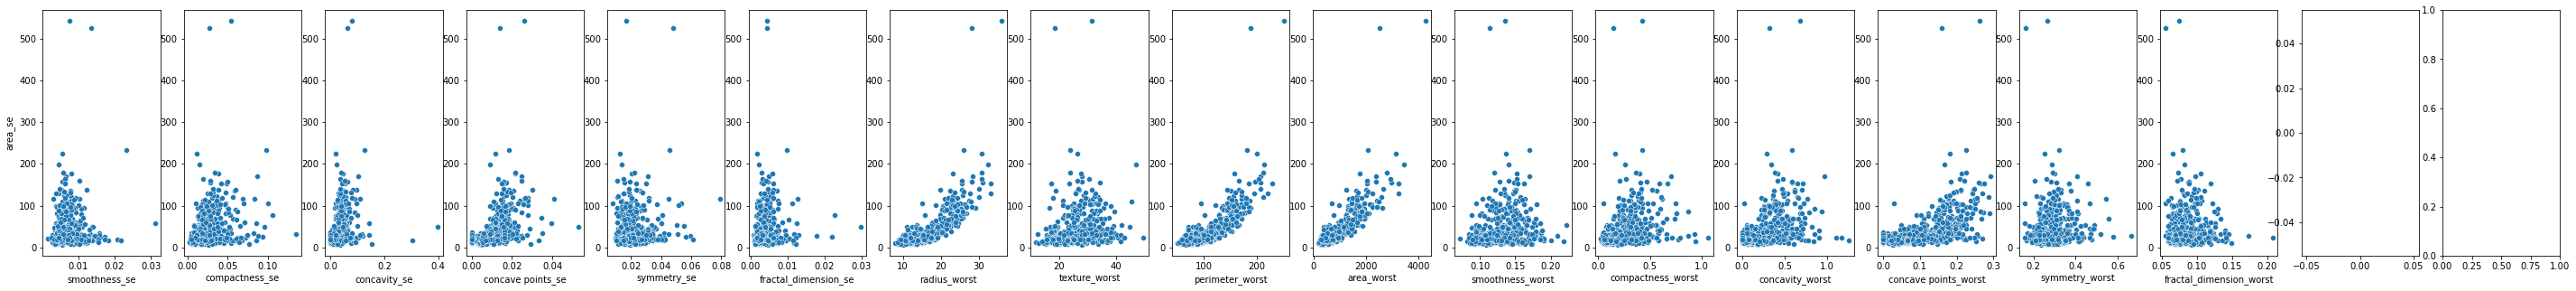

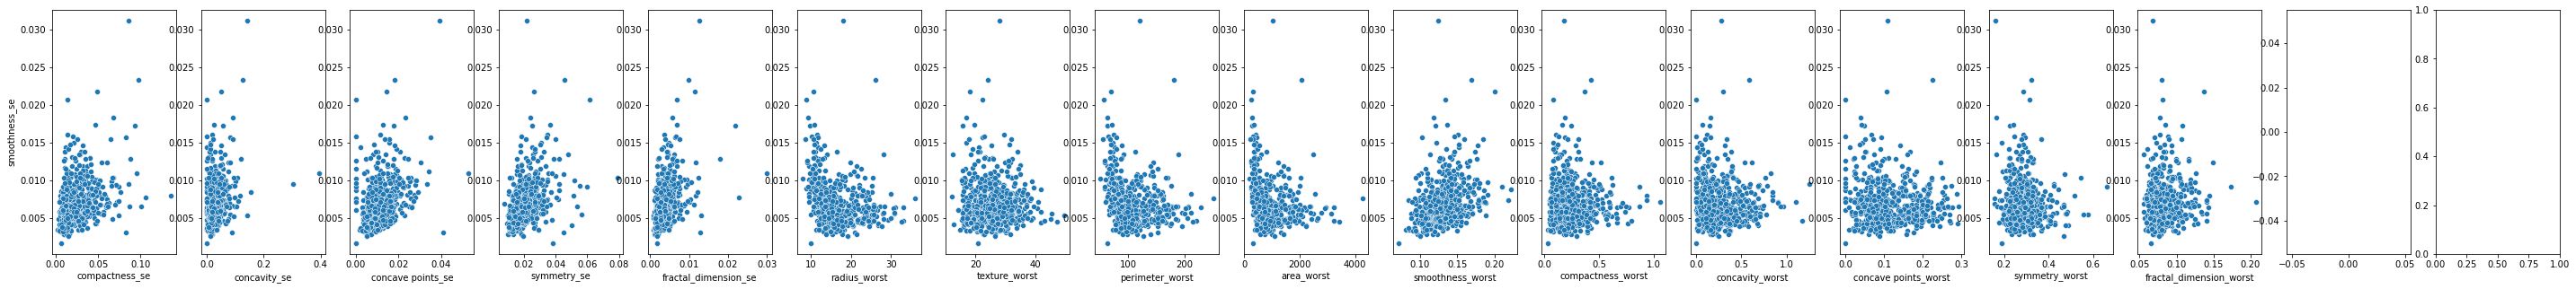

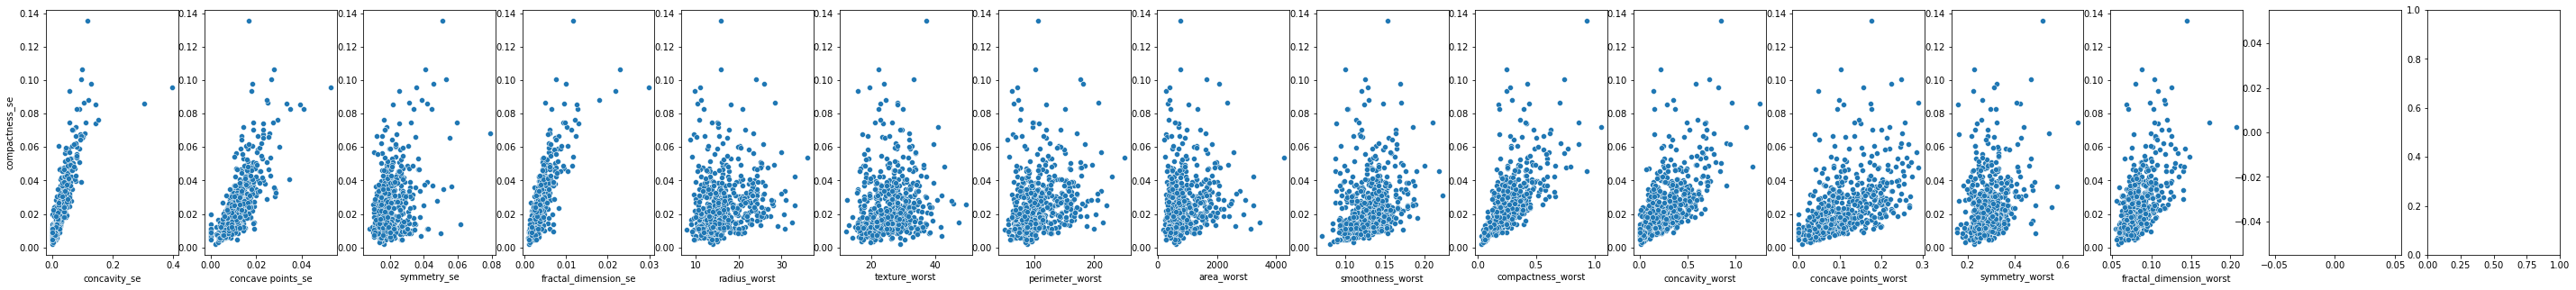

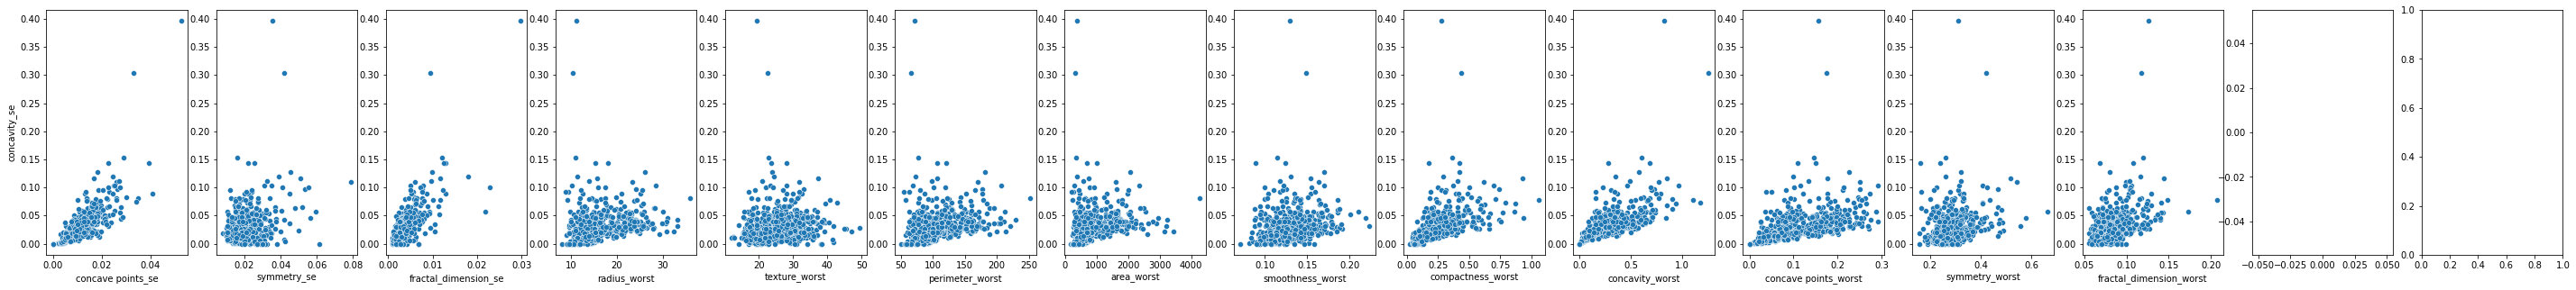

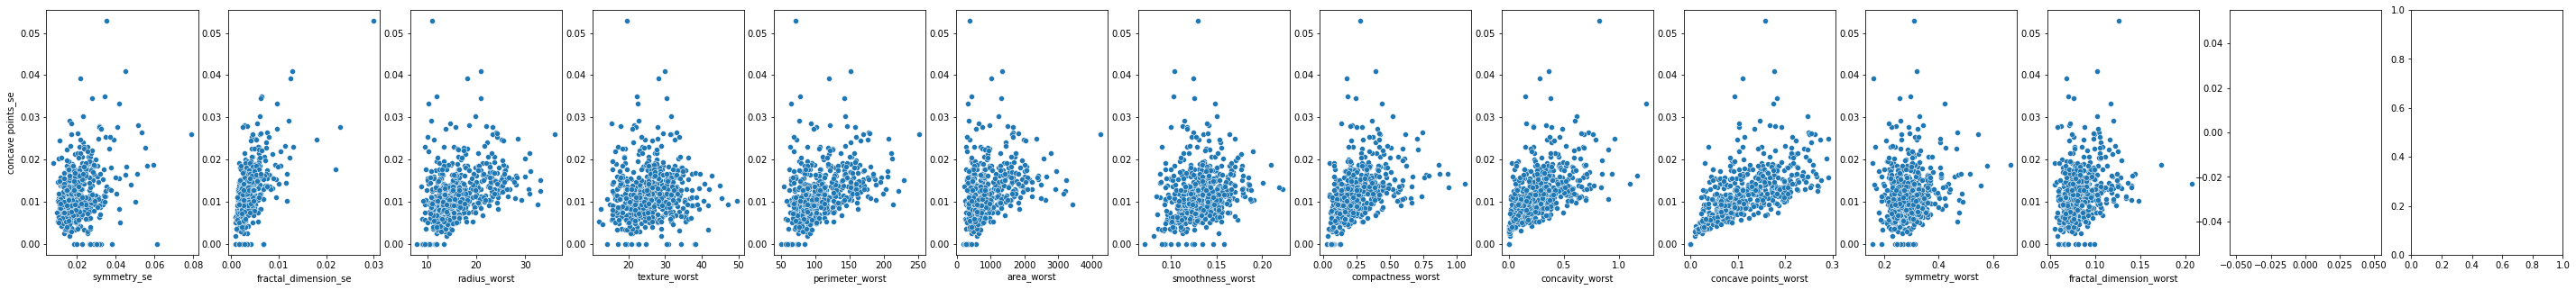

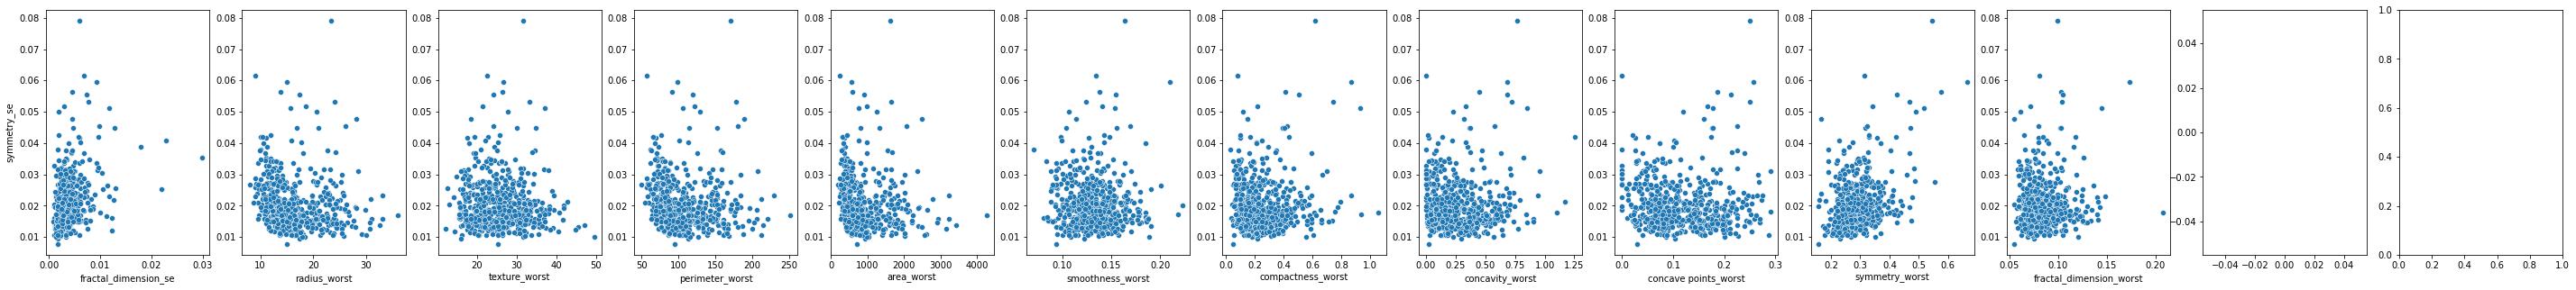

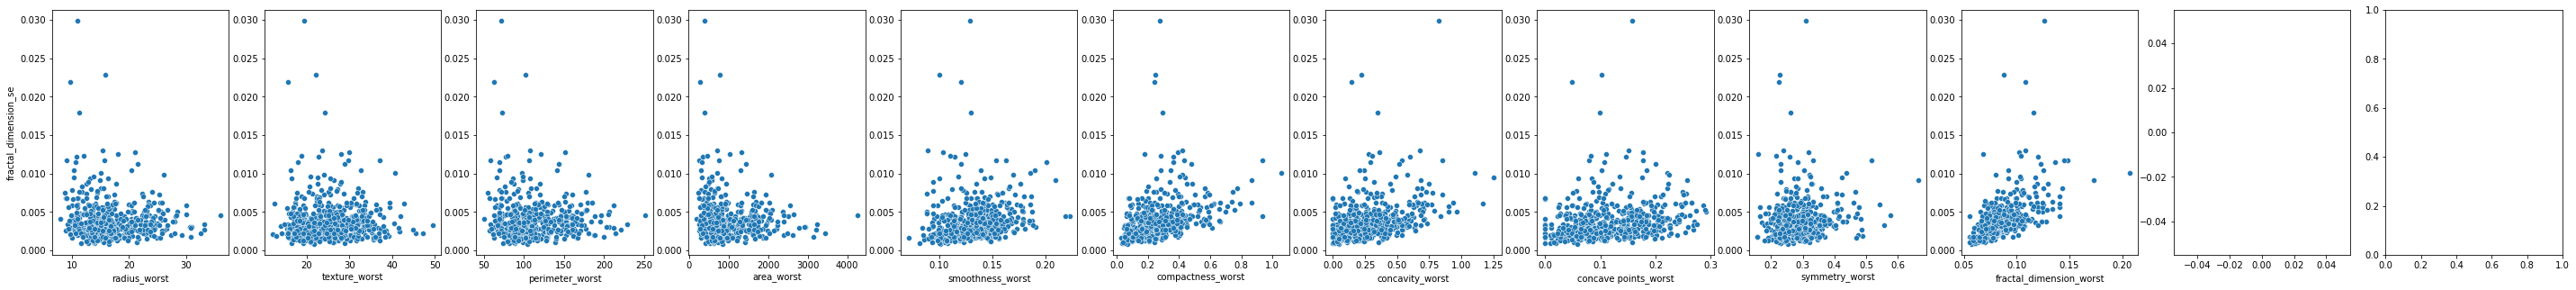

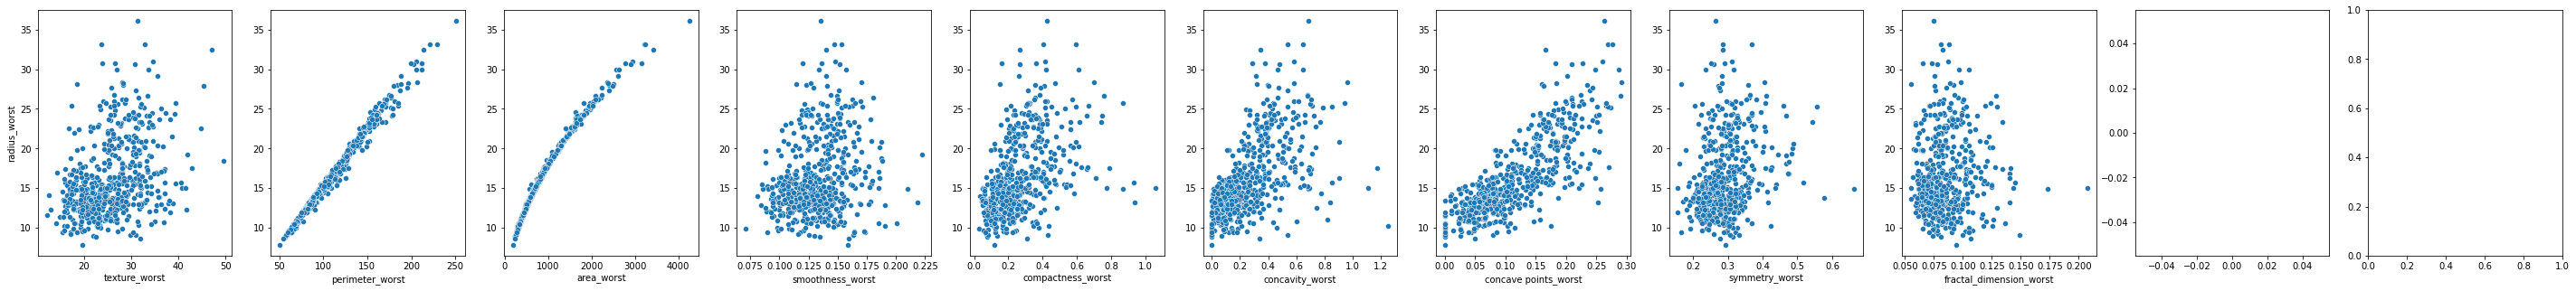

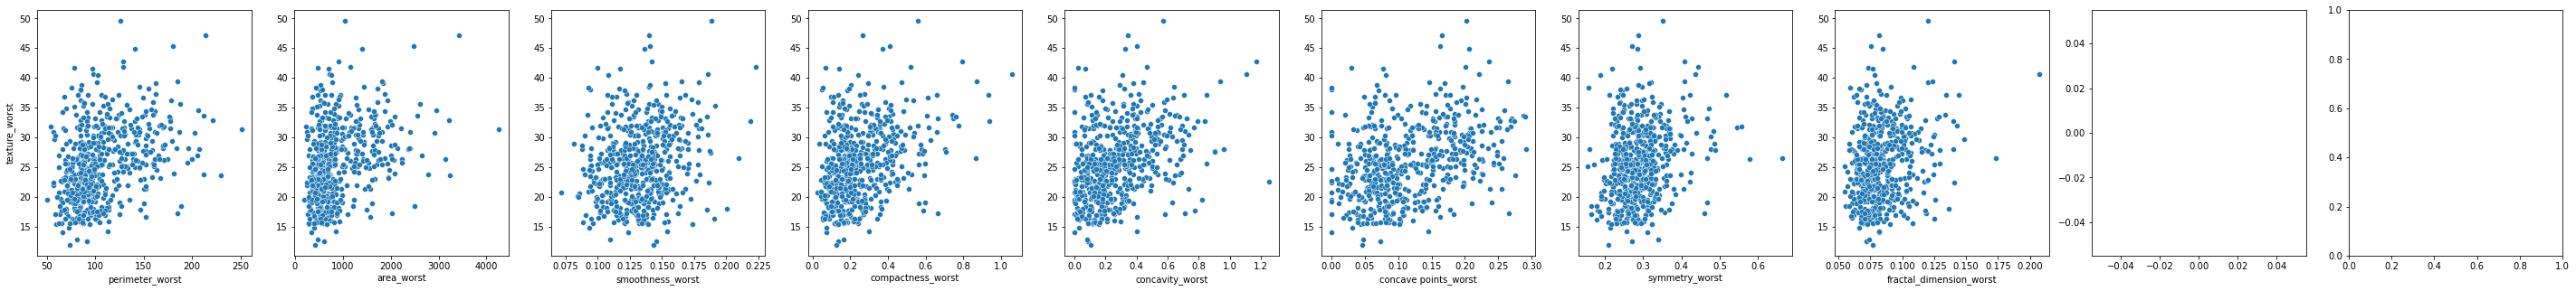

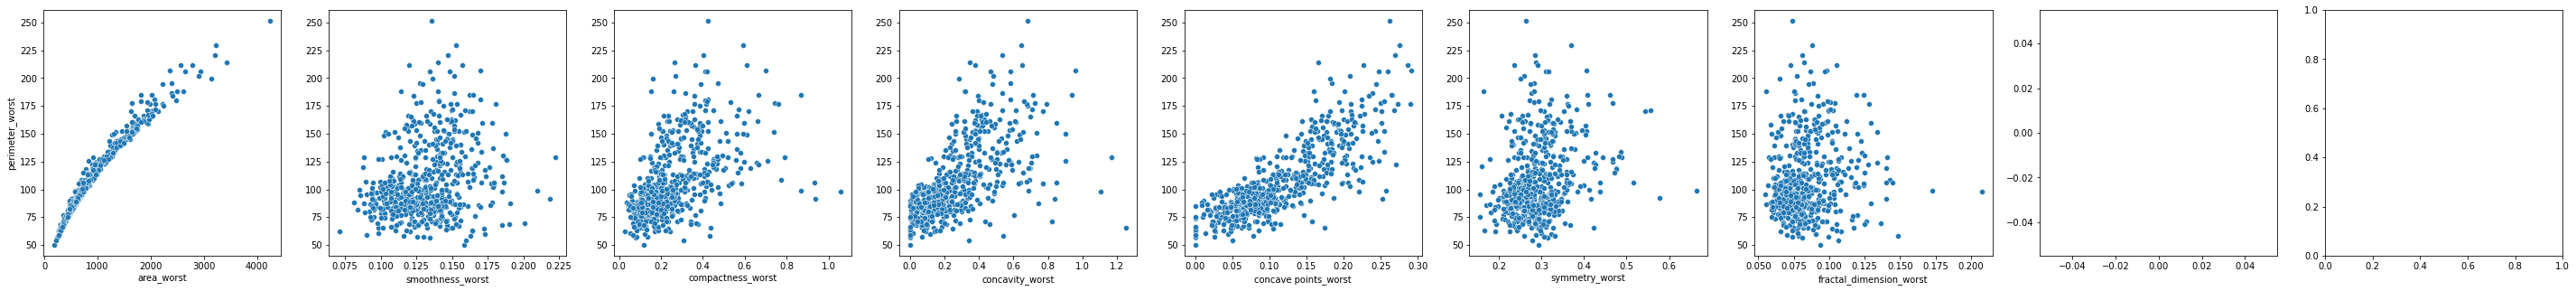

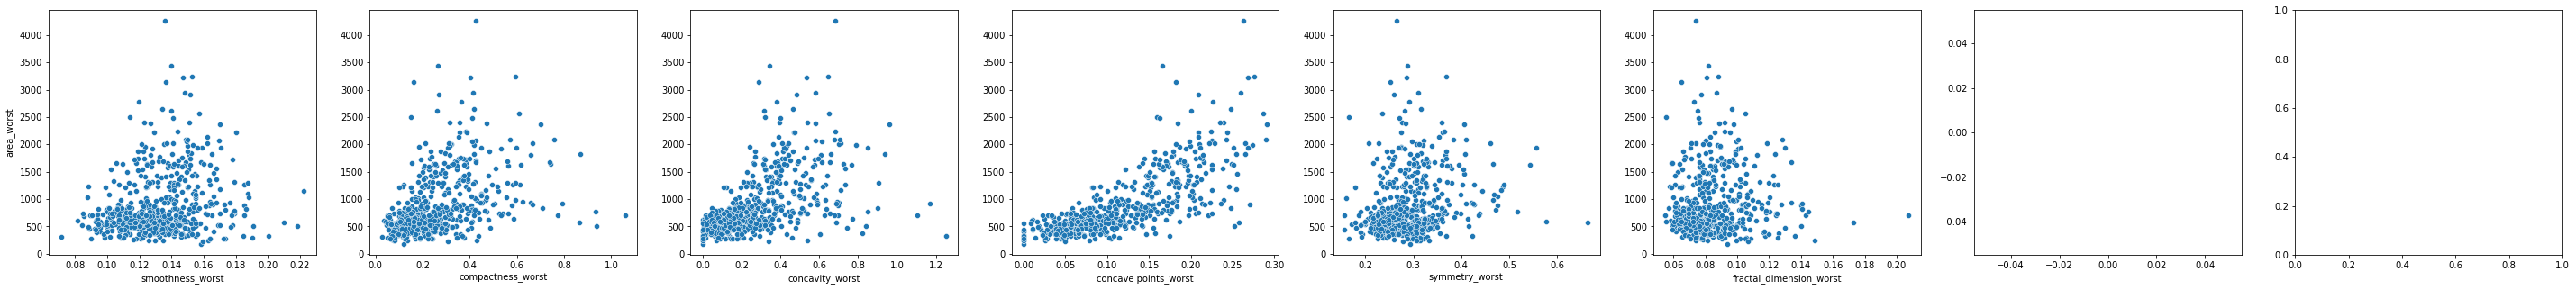

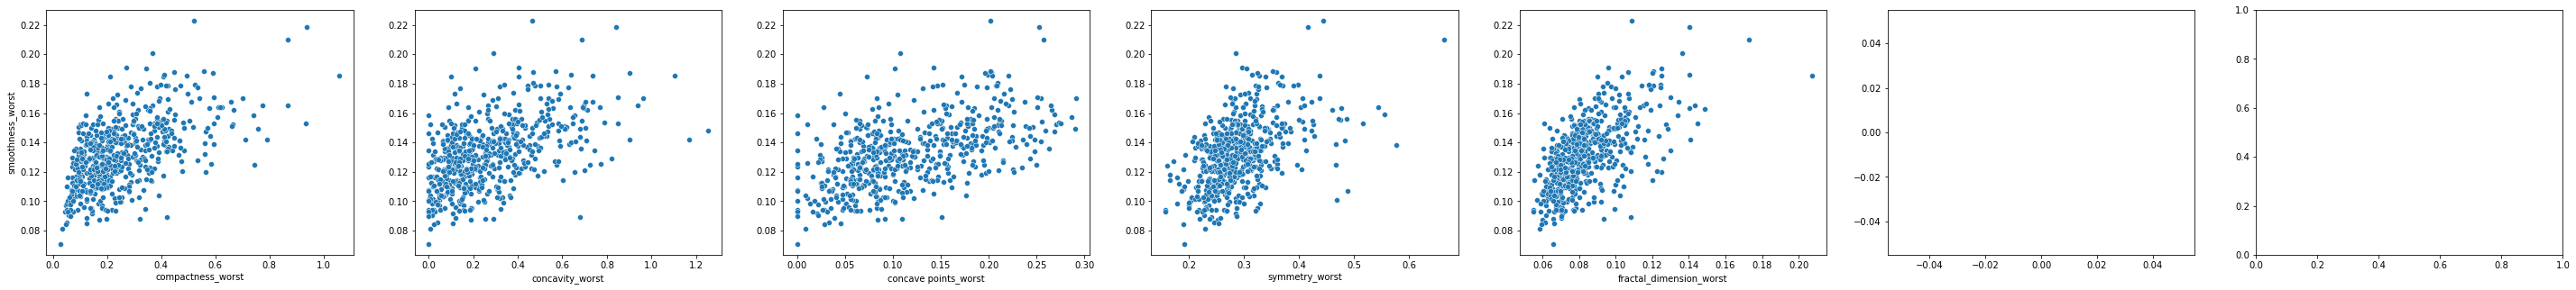

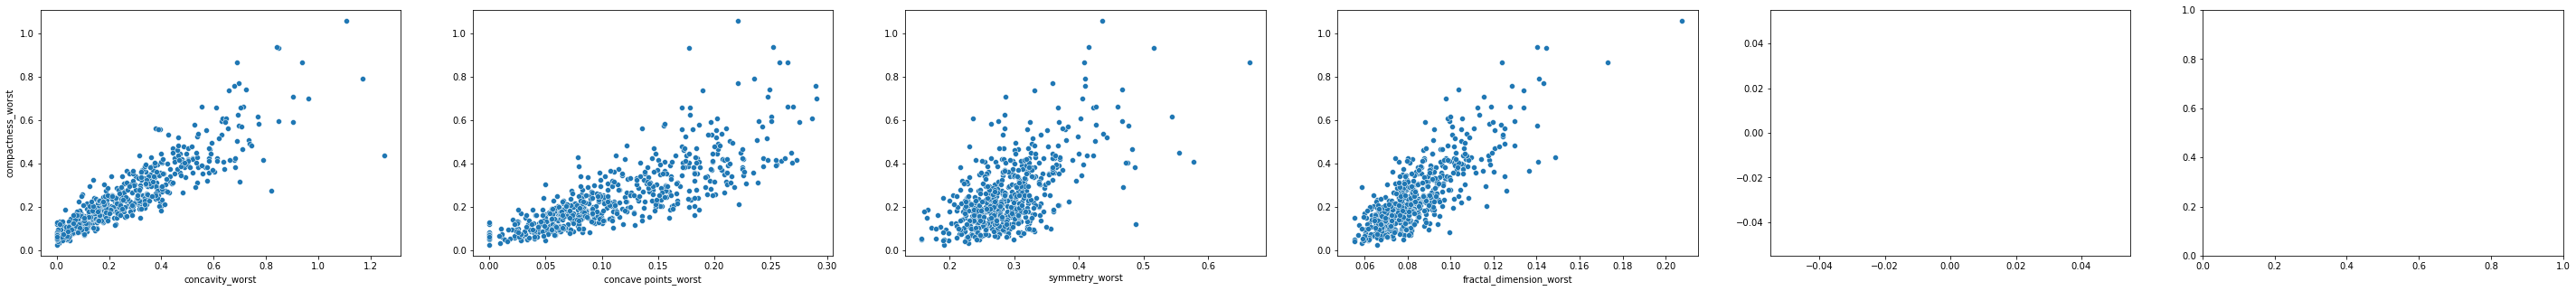

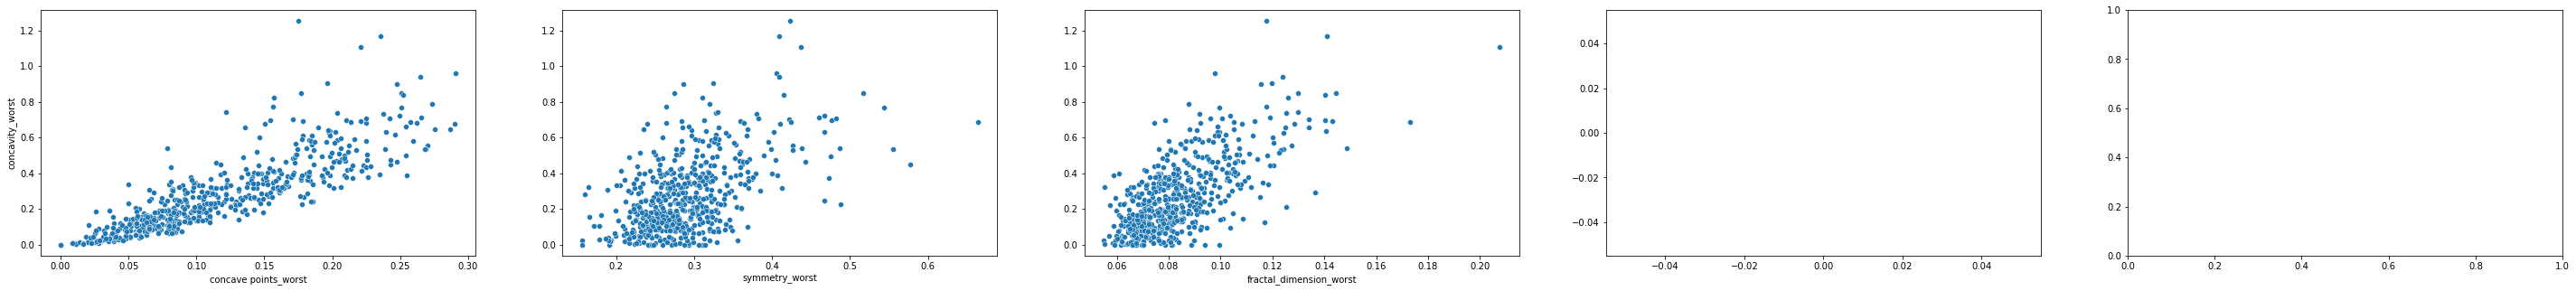

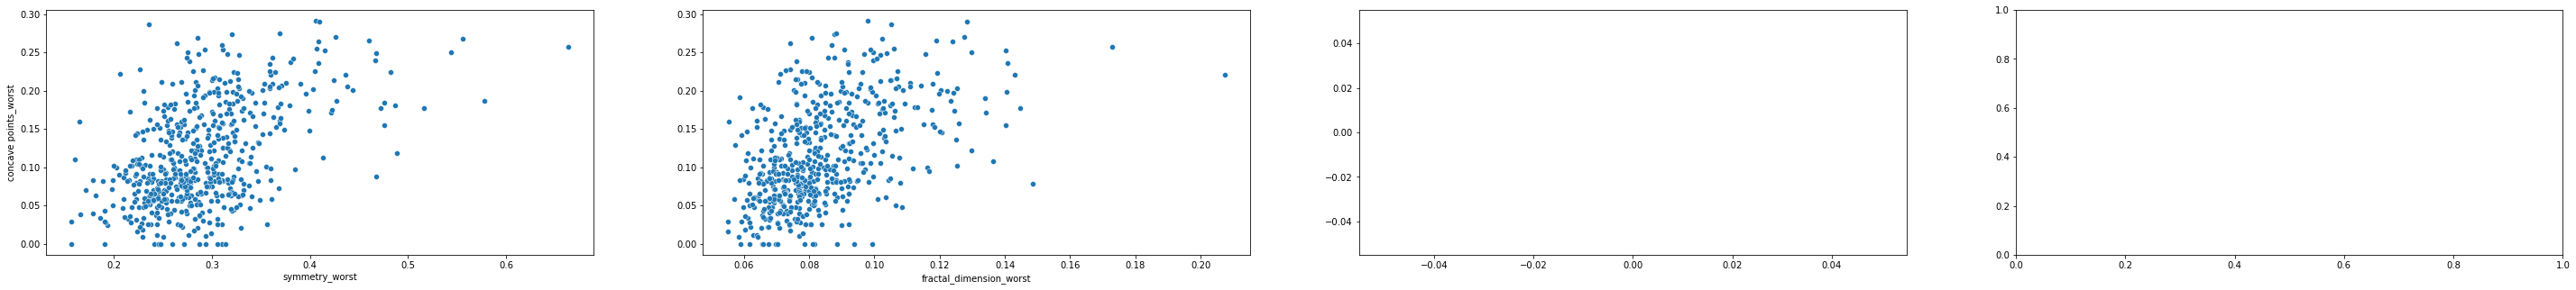

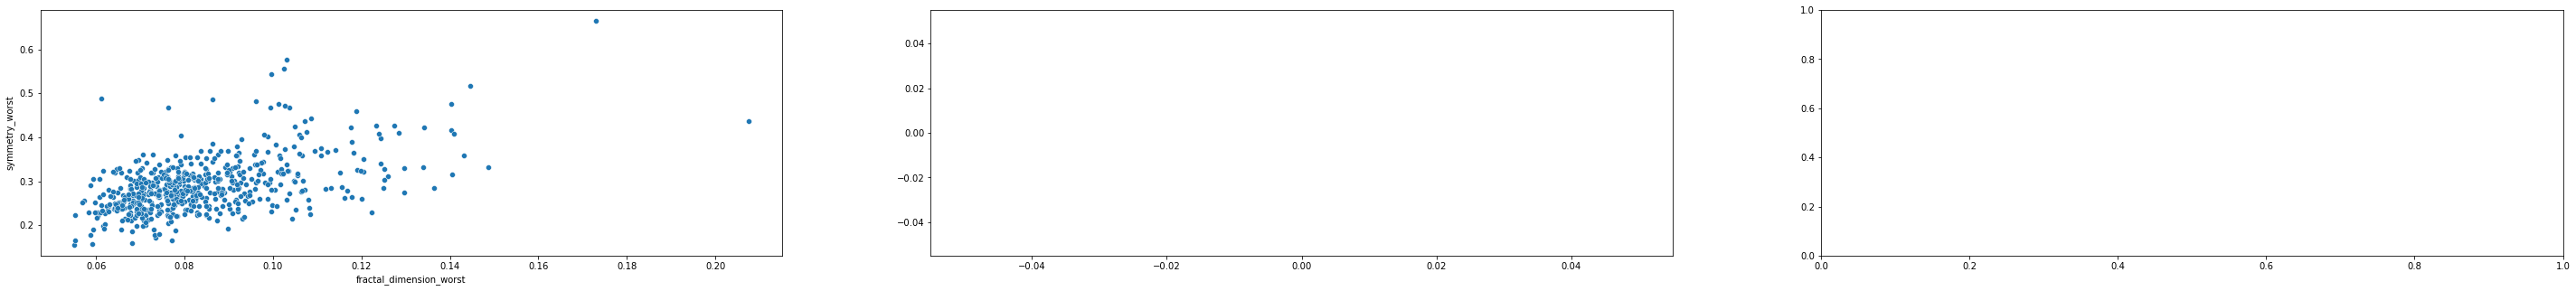

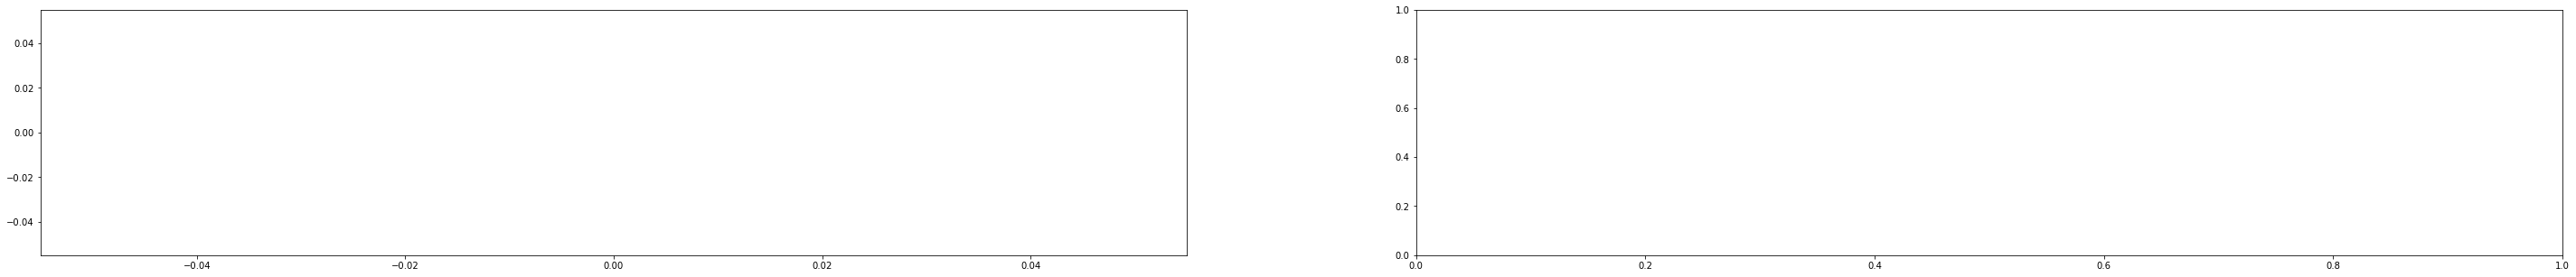

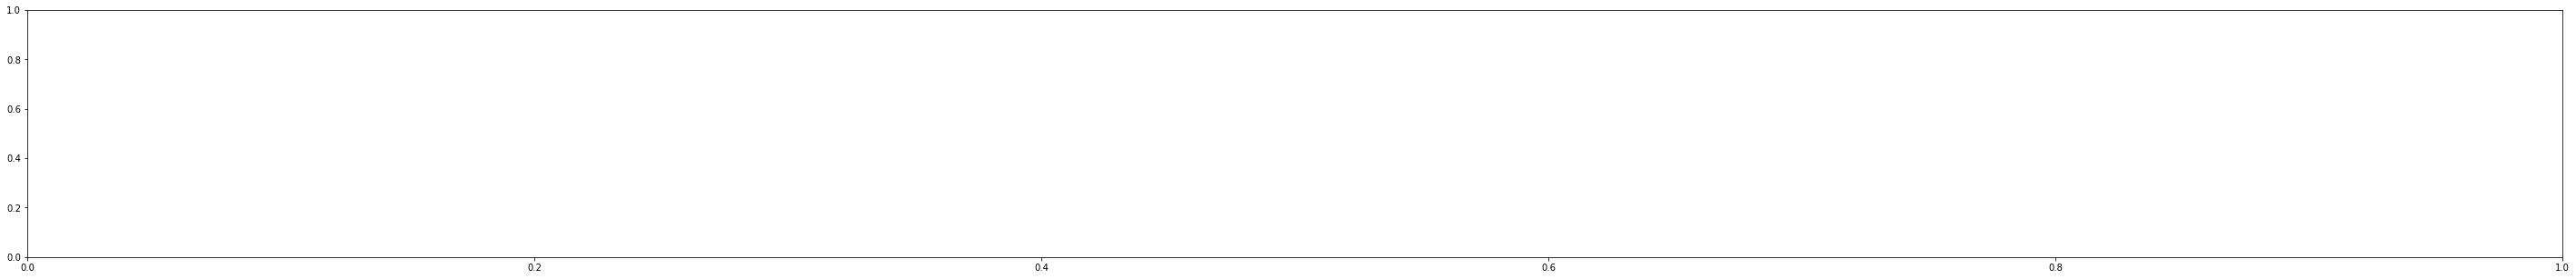

In [9]:
corr = data.corr()

sns.heatmap(corr)
plt.show()

# generate the scatter bivariate distribution to understand the data in more better manner

for i in range (len(data.columns)):
    fig,axes = plt.subplots(1,len(data.columns)-i , figsize=(50, 5))
    for j in range (i+1 , len(data.columns)):
            sns.scatterplot(ax=axes[j-(i+1)],x=data[data.columns[j]],y=data[data.columns[i]])
            if(j!=(i+1)):
                 axes[j-(i+1)].set_ylabel('') 

    plt.show()


It looks like that some of the features are correlated to some of the other features Hence  we might not consider the logistic regression because features are not independent. 

Now lets proceed for feature selection in order to  classify the cancer cases.
Feature selection is an important step in the machine learning modeling. There are many a times cases where some features may be independent with respect to dependent variables and hence considering them might introduce noise to the overall model learning capabilities hence it is important to  identify all those features which are important for selection. 

Chi Square method is one of the popular method to identify the important features. chi square test depends on  factors such as degree of freedom, in our case degree of freedom is (r-1)*(n-1) n = ' of different values in dependent feature and r = # of different values in independent feature

Lets use the chi square method to select the important features.

In [10]:
from scipy.stats import chi2_contingency

features_pValue = dict()

for i in range(len(data.columns)):
    contigency_table = pd.crosstab(data[data.columns[i]],Labels)
    c,p,dof,expected = chi2_contingency(contigency_table)
    print("{} , {}".format(data.columns[i],p))
    features_pValue[data.columns[i]]=p

radius_mean , 0.029296084732760866
texture_mean , 0.2505929829141976
perimeter_mean , 0.15825729311937892
area_mean , 0.3070888453840926
smoothness_mean , 0.6158417342512038
compactness_mean , 0.4122684162266766
concavity_mean , 0.24436532508927636
concave points_mean , 0.25212232984625904
symmetry_mean , 0.3952856140729297
fractal_dimension_mean , 0.48631413368882737
radius_se , 0.2809090672900764
texture_se , 0.5224154613372465
perimeter_se , 0.22653457720879974
area_se , 0.2128353140779051
smoothness_se , 0.3483575699433711
compactness_se , 0.36016986985878424
concavity_se , 0.24617650704237956
concave points_se , 0.4177543839019003
symmetry_se , 0.6083255561888706
fractal_dimension_se , 0.44850665164307435
radius_worst , 0.0049616262938718065
texture_worst , 0.4320580473031923
perimeter_worst , 0.23132246212653015
area_worst , 0.31549479667549757
smoothness_worst , 0.2427292940176238
compactness_worst , 0.261727153334381
concavity_worst , 0.2922899709947356
concave points_worst , 0

ValueError: No data; `observed` has size 0.

Based on the results we can assume that some of the features are highly independent form the rest as their p value is even larger than 50%. Hence we can now remove all such features.
P.S. Here we are selecting a higher alpha value to discrimate between important geatures and not important features hence may be we are commiting Type 1 error but looking at the resukls it seems that not a lot of features would be selected if we select a very low alpha value which can make our model too dependent on 1 or 2 features only, Hence we are taking a larger value to select important features.



In [ ]:
index =[] 
for item in features_pValue:
    if(features_pValue.get(item)>0.25):
        index.append(item)

Filtered_data = data.drop(columns=index,axis=0)

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn import svm

scaler = StandardScaler()
Filtered_data = scaler.fit_transform(Filtered_data)
Labels = np.array(Labels).astype(float)
#Labels[Labels==0]= -1
Trainx , TestX, TrainY , TestY = train_test_split(Filtered_data,Labels,test_size=0.2)
#Labels[Labels==0]= -1
#print(np.shape(np.array(TrainY)))
#Trainx =np.array([[1,1],[0,0]])
#TrainY =np.ones(shape=(455,))
#TrainY = np.concatenate([np.zeros(shape=(300,)),np.ones(shape=(155,))])
print(TrainY.shape)
print(np.unique(TrainY))
svmModel = svm.SVC(kernel='linear')
svmModel.fit(Trainx,TrainY)
prediction = svmModel.predict(TestX)
print(prediction)

from sklearn.metrics import accuracy_score

print(accuracy_score(TestY,prediction)*100)







(455,)

[0. 1.]

[0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0.

 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0.

 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0.

 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0.

 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0.]

99.12280701754386
